In [1]:
#Objective:Amazon is well-known as a customer-oriented corporation. 
#Sentimental Analysis on the review, price, which words

import pandas as pd
import numpy as np

df = pd.read_csv("/Users/selenenganhuynh/Downloads/AmazonReviewDataset.csv")

df.head()
print(df.columns)



Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [2]:
#which column is target variable, which is caterorical and which is numerical 
#27 columns, 
df.describe(include="all")
import sys
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
#why a lot of data missing, because you dont have to fill in all the sessions during the review
df.dtypes

id                       object
asins                    object
brand                    object
categories               object
colors                   object
dateAdded                object
dateUpdated              object
dimension                object
ean                     float64
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
prices                   object
reviews.date             object
reviews.doRecommend      object
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
sizes                   float64
upc                     float64
weight                   object
dtype: object

In [4]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [5]:
# cleaning data set
df.isnull().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [6]:
# Remove id, asins, colors (a lot of missing values), dimension, ean, keys, review.sourceURLs, city, 
# province, username, sizes, upc, weight, manufacturer, manufacturerNumber, reviews.date, reviews.numHelpful
df.drop(['asins','colors','dimension','ean','keys','manufacturer','manufacturerNumber','reviews.numHelpful',
        'reviews.sourceURLs','reviews.userCity','reviews.userProvince','reviews.username',
        'sizes','upc','weight', 'reviews.doRecommend', 'dateAdded', 'dateUpdated', 'prices'], axis=1, inplace=True)
df.head(10)

,id,brand,categories,name,reviews.date,reviews.rating,reviews.text,reviews.title
0,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-08-08T00:00:00.000Z,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!"
1,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-09-01T00:00:00.000Z,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More
2,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-07-20T00:00:00.000Z,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader
3,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2017-06-16T00:00:00.000Z,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship
4,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2016-08-11T00:00:00.000Z,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT
5,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-07-08T00:00:00Z,NaN,"My previous kindle was a DX, this is my second...",Great device for reading. 8 people found this ...
6,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-09-01T00:00:00Z,NaN,Allow me to preface this with a little history...,One Simply Could Not Ask For More 28 people fo...
7,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-07-03T00:00:00Z,NaN,Just got mine right now. Looks the same as the...,Definitely better than the previous generation...
8,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-08-08T00:00:00Z,NaN,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets! 16 people found..."
9,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-07-20T00:00:00Z,NaN,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader 19 ...


In [7]:
#After deleting columns that are not necessary for sentimental analysis, I will check again for missing values 
df.isnull().sum()

id                  0
brand               0
categories          0
name                0
reviews.date      380
reviews.rating    420
reviews.text        0
reviews.title      17
dtype: int64

In [8]:
df.rename(columns = {'name':'product name'}, inplace = True)

In [9]:
#Drop missing values from reviews rating column so we can split them into positive, negative, or neutral rating 
#to copmpare with the review text
df.dropna(inplace = True)
df.head(10)

,id,brand,categories,product name,reviews.date,reviews.rating,reviews.text,reviews.title
0,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-08-08T00:00:00.000Z,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!"
1,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-09-01T00:00:00.000Z,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More
2,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-07-20T00:00:00.000Z,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader
3,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2017-06-16T00:00:00.000Z,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship
4,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2016-08-11T00:00:00.000Z,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT
58,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-03T00:00:00Z,4.0,"Having received my Fire TV today, I've been tr...",Works great with one critical flaw. (significa...
61,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-03T00:00:00Z,4.0,"Having received my Fire TV today, I've been tr...",Works great with one critical flaw. (significa...
63,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-07T00:00:00Z,5.0,I'm your typical middle-aged woman - I don't g...,"A review from a non-techie 11,064 people found..."
68,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-06T00:00:00Z,4.0,An Amazon.com official commented on this revie...,"I like it Amazon...But this is IMPORTANT 5,863..."
78,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-07T00:00:00Z,5.0,I'm your typical middle-aged woman - I don't g...,"A review from a non-techie 11,065 people found..."


In [10]:
#Classifying Review Ratings
#Assign review > 3 is positive review
#Assign review = 3 is neutral review
#Assign review < 3 is bad review
conditions = [
    (df['reviews.rating'] > 3),
    (df['reviews.rating'] == 3),
    (df['reviews.rating'] < 3)
]

values = [1, 0, -1]

#create new column called sentiment:
df['sentiment'] = np.select(conditions, values)
df.head(40)
#From the sample data set, we can see that there's a lot of reviews with positive rating, only 1 negative review in 
#a set of 40 samples

,id,brand,categories,product name,reviews.date,reviews.rating,reviews.text,reviews.title,sentiment
0,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-08-08T00:00:00.000Z,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",1
1,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-09-01T00:00:00.000Z,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,1
2,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-07-20T00:00:00.000Z,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,1
3,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2017-06-16T00:00:00.000Z,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,1
4,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2016-08-11T00:00:00.000Z,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,1
58,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-03T00:00:00Z,4.0,"Having received my Fire TV today, I've been tr...",Works great with one critical flaw. (significa...,1
61,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-03T00:00:00Z,4.0,"Having received my Fire TV today, I've been tr...",Works great with one critical flaw. (significa...,1
63,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-07T00:00:00Z,5.0,I'm your typical middle-aged woman - I don't g...,"A review from a non-techie 11,064 people found...",1
68,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-06T00:00:00Z,4.0,An Amazon.com official commented on this revie...,"I like it Amazon...But this is IMPORTANT 5,863...",1
78,AVpff7_VilAPnD_xc1E_,Amazon,"Categories,Amazon Devices,Streaming Media Players",Certified Refurbished Amazon Fire TV (Previous...,2014-04-07T00:00:00Z,5.0,I'm your typical middle-aged woman - I don't g...,"A review from a non-techie 11,065 people found...",1


In [11]:
# split df - positive, neutral, and negative sentiment:
positive = df[df['sentiment'] == 1]
neutral = df[df['sentiment'] == 0]
negative = df[df['sentiment'] == -1]

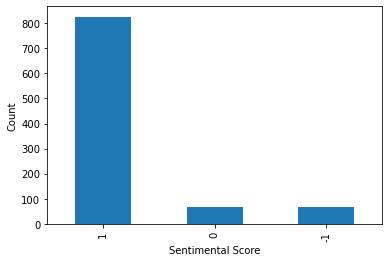

In [12]:
#display the frequency of each sentiment score
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel("Sentimental Score")
plt.ylabel("Count")
plt.show()

In [16]:
import nltk
from nltk.corpus import stopwords

In [14]:
df.rename(columns = {'reviews.title':'title'}, inplace = True)
df.head(5)

,id,brand,categories,product name,reviews.date,reviews.rating,reviews.text,title,sentiment
0,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-08-08T00:00:00.000Z,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",1
1,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-09-01T00:00:00.000Z,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,1
2,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2015-07-20T00:00:00.000Z,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,1
3,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2017-06-16T00:00:00.000Z,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,1
4,AVpe7AsMilAPnD_xQ78G,Amazon,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,2016-08-11T00:00:00.000Z,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,1


In [13]:
#Based on the graph, there are only few negative and neutral ratings compared to positive ratings
import sys
!{sys.executable} -m pip install wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS



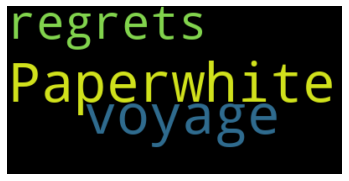

In [17]:
# Start with one review:
text = df.title[0]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
stopwords = set(STOPWORDS)
stopwords.update(["regrets"]) 
## regrets removed because they were included in positive review rating